## Topic Modelling using LDA and NMF

In [93]:
import collections
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
import spacy
from stop_words import get_stop_words
from wordcloud import WordCloud

In [2]:
def extract_adj(doc):
    ''' 
    Extract adjectives from a script
    '''
    adj_list = []

    for sent in doc.sents:
        for token in sent:
            # If part of speech corresponds to adjective
            # Add the word to the list previously initialised
            if token.tag_=='A':
                adj_list.append(token.text)
    return adj_list

In [3]:
def visualize_wordcloud(dtm, lda=True):
    '''
    Plot a wordcloud
    '''
    X = dtm.toarray()
    
    # Create a dataframe made up by the sentences and words used
    if lda==True:
        bow = pd.DataFrame(X, columns=cv.get_feature_names())
    else:
        bow = pd.DataFrame(X, columns=tfidf.get_feature_names())
        
    # Create a pandas Series of the top 50 most frequent words
    top50_freq_words = bow.sum(axis=0).sort_values(ascending=False)[:50]
    # Generate a dict containing word-frequency pairs
    top50_freq_words_dict = top50_freq_words.to_dict()

    # Create the WordCloud object
    wordcloud = WordCloud(min_word_length=3, background_color='white')
    # Generate the WordCloud
    wordcloud.generate_from_frequencies(top50_freq_words_dict)

    # Plot
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [4]:
def remove_num_tokens(sents_list):
    '''
    Remove numerical tokens from a list of sentences
    '''
    for idx_sent, sent in enumerate(sents_list):
        # Iterate over all words contained in a sentence
        for token in nlp(sent):
            if token.pos_=='NUM':
                # Split the sentence where the number has been detected
                split_sent = sent.split()
                # Remove the detected number in the split list
                for word in split_sent:
                    if word==token.text:
                        split_sent.remove(word)
                        # Replace the resulting sentence with the original
                        sents_list[idx_sent] = ' '.join(split_sent)
    return sents_list

In [5]:
stop_words = get_stop_words('it')

In [6]:
nlp = spacy.load('it_core_news_md')

### Extract top three topics for each TV news broadcaster (one-week results) 

In [7]:
# Add stop words to stop_words list. (These words are collected after first results were obtained)
# Goal: to enhance results interpretability
stop_words_bunch1 = ['sempre','mai','fa','solo','poi','cosa','dopo','dice','quando','essere','fatto','così','oggi','ora','prima','modo','invece','oltre','resta','mentre','intanto','detto','cioè']

In [8]:
stop_words.extend(stop_words_bunch1)

In [9]:
stop_words_bunch2 = ['andiamo','proprio','già','subito','stata','quel','lì','forse','aver','piu']

In [10]:
stop_words.extend(stop_words_bunch2)

In [43]:
# Initialise lists that will be populated by TV news sentences
tv_news_A_sents = []
tv_news_B_sents = []
tv_news_C_sents = []

# Initialise lists that will be populated by adjectives
tv_news_A_adj = []
tv_news_B_adj = []
tv_news_C_adj = []

# Initialise dataframes to collect the different topics obtained
# by applying LDA and NMF
df_topics_lda = pd.DataFrame()
df_topics_nmf = pd.DataFrame()

Now TGA20220502.json is being extracted
Now TGA20220503.json is being extracted
Now TGA20220504.json is being extracted
Now TGA20220505.json is being extracted
Now TGA20220506.json is being extracted
Now TGA20220507.json is being extracted
Now TGA20220508.json is being extracted
Now TGB20220502.json is being extracted
Now TGB20220503.json is being extracted
Now TGB20220504.json is being extracted
Now TGB20220505.json is being extracted
Now TGB20220506.json is being extracted
Now TGB20220507.json is being extracted
Now TGB20220508.json is being extracted
Now TGC20220502.json is being extracted
Now TGC20220503.json is being extracted
Now TGC20220504.json is being extracted
Now TGC20220505.json is being extracted
Now TGC20220506.json is being extracted
Now TGC20220507.json is being extracted
Now TGC20220508.json is being extracted

Results are being displayed for TG#1...

LDA


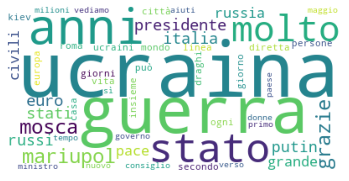

NMF


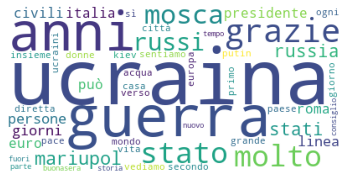


Results are being displayed for TG#2...

LDA


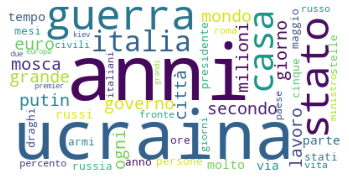

NMF


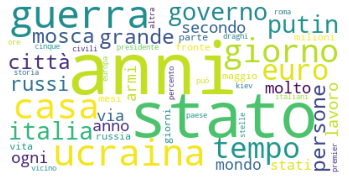


Results are being displayed for TG#3...

LDA


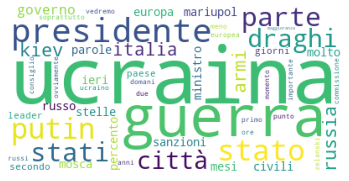

NMF


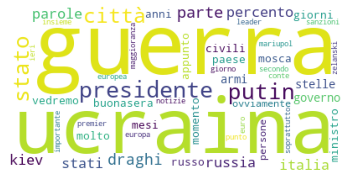

In [44]:
file_path = "C:\\Users\\loren\\Documents\\Personali\\Università\\UNIMI\\CORSI\\YEAR 2\\Text Mining and Sentiment Analysis\\Trascrizioni\\"
files = os.listdir(file_path)
tv_news_names = ['TG#1','TG#2','TG#3']

for idx_file, file in enumerate(files):
    tv_news_name = file[:3]
    with open(file_path + file, encoding='utf-8') as f:
        data = json.load(f)
    print(f"Now {file} is being extracted")
    
    # Obtain the TV news transcript from the file
    txt = data['results']['transcripts'][0]['transcript']
    doc = nlp(txt)
    doc_sents = [sent.text for sent in doc.sents]
    
    # Remove numerical tokens from sentences
    doc_sents = remove_num_tokens(doc_sents)
    
    # Extract adjectives from each broadcaster transcript
    adj_list = extract_adj(doc)
        
    if tv_news_name == 'TGA':
        tv_news_A_sents.extend(doc_sents)
        tv_news_A_adj.extend(adj_list)
    elif tv_news_name == 'TGB':
        tv_news_B_sents.extend(doc_sents)
        tv_news_B_adj.extend(adj_list)
    elif tv_news_name == 'TGC':
        tv_news_C_sents.extend(doc_sents)
        tv_news_C_adj.extend(adj_list)
    
    # Once text from all the files inside the directory have been extracted,
    # move sentences saved for each TV news into distinct dataframes
    # (doing so, then, it is more convenient to apply LDA/NMF)
    if idx_file == len(files)-1:
        df_A = pd.DataFrame()
        df_A['Sentence'] = tv_news_A_sents
        df_B = pd.DataFrame()
        df_B['Sentence'] = tv_news_B_sents
        df_C = pd.DataFrame()
        df_C['Sentence'] = tv_news_C_sents
    
        tv_news_sents = [df_A['Sentence'], df_B['Sentence'], df_C['Sentence']]

        # Fit Latent Dirichlet Allocation and Non-negative Matrix Factorization to Document Term Matrix
        for idx_tv_news, sents_block in enumerate(tv_news_sents):
            print(f'\nResults are being displayed for TG#{idx_tv_news+1}...')
            #LDA
            cv = CountVectorizer(max_df=0.50,min_df=5,stop_words=stop_words, ngram_range=(1,1))
            dtm_lda = cv.fit_transform(sents_block)

            lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
            lda_model.fit(dtm_lda)            
            topic_results_lda = lda_model.transform(dtm_lda)

            #NMF
            tfidf = TfidfVectorizer(max_df=0.50,min_df=5,stop_words=stop_words, ngram_range=(1,1))
            dtm_nmf = tfidf.fit_transform(sents_block)

            nmf_model = NMF(n_components=3,random_state=42)
            nmf_model.fit(dtm_nmf)
            topic_results_nmf = nmf_model.transform(dtm_nmf)
            
            if idx_tv_news == 0:
                df_A['Topic (LDA)'] = [topic_results_lda[sent].argmax() for sent in range(len(sents_block))]
                df_A['Topic (NMF)'] = [topic_results_nmf[sent].argmax() for sent in range(len(sents_block))]
            elif idx_tv_news == 1:
                df_B['Topic (LDA)'] = [topic_results_lda[sent].argmax() for sent in range(len(sents_block))]
                df_B['Topic (NMF)'] = [topic_results_nmf[sent].argmax() for sent in range(len(sents_block))]
            elif idx_tv_news == 2:
                df_C['Topic (LDA)'] = [topic_results_lda[sent].argmax() for sent in range(len(sents_block))]
                df_C['Topic (NMF)'] = [topic_results_nmf[sent].argmax() for sent in range(len(sents_block))]
            
            # Grab the highest probability words per topic and put them into dataframes            
            for idx_topic, topic in enumerate(lda_model.components_):
                topic_top_words = [cv.get_feature_names()[index] for index in topic.argsort()[-10:][::-1]]
                df_topics_lda[f'Topic#{idx_topic+1} {tv_news_names[idx_tv_news]}'] = topic_top_words
                
            for idx_topic, topic in enumerate(nmf_model.components_):
                topic_top_words = [tfidf.get_feature_names()[index] for index in topic.argsort()[-10:][::-1]]
                df_topics_nmf[f'Topic#{idx_topic+1} {tv_news_names[idx_tv_news]}'] = topic_top_words
                
            # Visualize wordcloud
            print("\nLDA")
            visualize_wordcloud(dtm_lda, True)
            # Visualize wordcloud
            print("NMF")
            visualize_wordcloud(dtm_nmf, False)

In [46]:
def count_topic_frequencies(df_list, lda=True):
    '''
    For each TV news, count the number of words belonging
    to each specific topic and add a row at the end
    of the dataframe.
    '''
    words_count = []
    
    if lda==True:
        col_title = 'Topic (LDA)'
    else:
        col_title = 'Topic (NMF)'
    
    for df in df_list:
        topic1_count, topic2_count, topic3_count = df[col_title].value_counts()
        words_count.extend((topic1_count, topic2_count, topic3_count))

    if lda==True:    
        df_topics_lda.loc[len(df_topics_lda)] = words_count
    else:
        df_topics_nmf.loc[len(df_topics_nmf)] = words_count

In [47]:
# Insert keywords in the last row to describe each topic (LDA)  
topics_resume_lda = ['anchor-man words','war (narrative)','war (specific events)','war (specific events)','war (Italian affairs)','economic measures','war (specific events)','war (Ukraine\'s affairs)','war (Russia\'s affairs)']
df_topics_lda.loc[len(df_topics_lda)] = topics_resume_lda

In [48]:
# Insert keywords in the last row to describe each topic (NMF)  
topics_resume_nmf = ['anchor-man words','war','others','war','general affairs','economic measures and dramatic stories','italian politics and economic measures','war','war (specific events)']
df_topics_nmf.loc[len(df_topics_nmf)] = topics_resume_nmf

In [49]:
df_list = [df_A, df_B, df_C]

count_topic_frequencies(df_list, True)
count_topic_frequencies(df_list, False)

In [50]:
# Rename index labels
df_topics_lda = df_topics_lda.rename(index={10: "topic", 11: "word count"})
df_topics_nmf = df_topics_nmf.rename(index={10: "topic", 11: "word count"})

In [45]:
def highlight_summary(df):
    '''
    Highlight the last row of a dataframe
    '''
    return ['font-weight: bold' if idx == df.iloc[-2] else ''
                for idx in df]

In [52]:
# Format dataframe borders
borders_left0 = {'selector': '.col0', 'props': 
                   [('border-left', '1px solid black')]}

borders_TGA_right = {'selector': '.col2', 'props': 
                  [('border-right', '1px solid blue')]}

borders_TGB_right = {'selector': '.col5', 'props': 
                  [('border-right', '1px solid orange')]}

borders_TGC_right = {'selector': '.col8', 'props': 
                  [('border-right', '1px solid green')]}

borders_bottom9 = {'selector': '.row9', 'props': 
                  [('border-bottom', '1.25px solid black')]}

borders_bottom10 = {'selector': '.row10', 'props': 
                  [('border-bottom', '1.25px solid black')]}
                    
df_topics_lda = df_topics_lda.style.set_table_styles([borders_left0,
                                                      borders_TGA_right,
                                                      borders_TGB_right,
                                                      borders_TGC_right,
                                                      borders_bottom9,
                                                      borders_bottom10]
                                                    ).apply(highlight_summary)

df_topics_nmf = df_topics_nmf.style.set_table_styles([borders_left0,
                                                      borders_TGA_right,
                                                      borders_TGB_right,
                                                      borders_TGC_right,
                                                      borders_bottom9,
                                                      borders_bottom10]
                                                    ).apply(highlight_summary)

In [54]:
df_topics_lda

,Topic#1 TG#1,Topic#2 TG#1,Topic#3 TG#1,Topic#1 TG#2,Topic#2 TG#2,Topic#3 TG#2,Topic#1 TG#3,Topic#2 TG#3,Topic#3 TG#3
0,anni,guerra,mariupol,russi,ucraina,anni,stelle,ucraina,presidente
1,grazie,ucraina,civili,mondo,casa,euro,mariupol,guerra,putin
2,euro,stato,russi,giorno,guerra,anno,guerra,kiev,sanzioni
3,italia,ogni,mosca,civili,governo,lavoro,civili,presidente,guerra
4,molto,insieme,ucraina,secondo,armi,milioni,percento,paese,russia
5,stati,giorno,grande,via,draghi,bonus,stati,parole,russo
6,persone,diretta,russia,città,fronte,percento,forze,città,mosca
7,linea,presidente,giorni,stato,anni,stato,zero,anni,miliardi
8,paese,sì,verso,mariupol,molto,guerra,ieri,parte,persone
9,consiglio,putin,ministro,parte,stelle,tempo,acciaieria,italia,consiglio


In [57]:
df_topics_nmf

,Topic#1 TG#1,Topic#2 TG#1,Topic#3 TG#1,Topic#1 TG#2,Topic#2 TG#2,Topic#3 TG#2,Topic#1 TG#3,Topic#2 TG#3,Topic#3 TG#3
0,grazie,ucraina,anni,guerra,anni,stato,ucraina,guerra,città
1,buona,guerra,molto,ucraina,carcere,casa,presidente,putin,nord
2,serata,russia,stato,putin,tempo,ospedale,draghi,giorno,parte
3,linea,mosca,giorni,giorno,pandemia,bambino,stato,ucraina,persone
4,roberto,stato,insieme,mosca,tre,tasse,kiev,telegiornale,ebrei
5,vediamo,putin,lavoro,russia,due,figlio,stati,ovviamente,base
6,stasera,kiev,persone,russi,omicidio,carabinieri,stelle,avanti,sindaco
7,europeo,presidente,vita,armi,ieri,donna,russia,parlare,esercito
8,andrea,pace,può,ogni,vent,padre,armi,riguarda,kharkiv
9,roma,stati,finalmente,città,fumetti,ormai,governo,giorni,centro


C:\Users\loren\anaconda3\envs\nlp_sentita\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


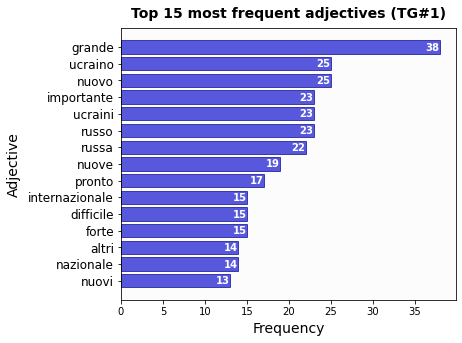

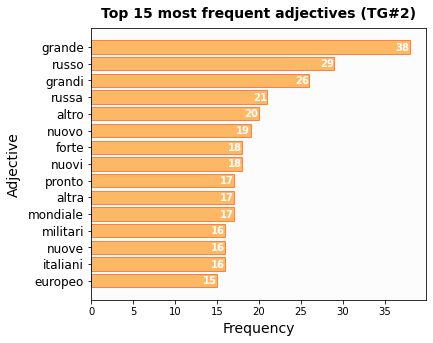

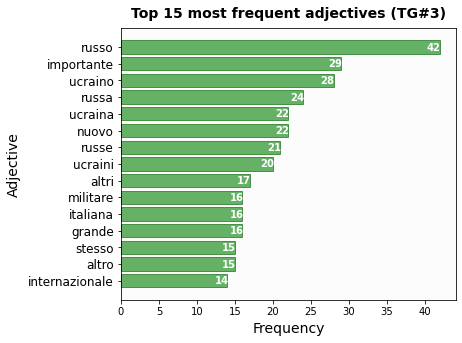

In [61]:
adj_lists = [tv_news_A_adj, tv_news_B_adj, tv_news_C_adj]
tv_news_colors = ['mediumblue', 'darkorange', 'green']
tv_news_edgecolors = ['darkblue', 'orangered', 'darkgreen']
tv_news_alpha = [0.65, 0.6, 0.6]

tv_news_names = ['TG#1','TG#2','TG#3']
limit = 15

for idx,tv_news in enumerate(adj_lists):
    counter = collections.Counter(tv_news)
    # Sort values
    sorted_counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    top_words = [key for key,value in sorted_counter][:limit]
    top_words_freq = [value for key,value in sorted_counter][:limit]     
    
    # Visualize most frequent adjectives
    fig, ax = plt.subplots(figsize=(6,5))
    
    y = top_words[::-1]
    x = top_words_freq[::-1]
    ax.barh(y, x, color=tv_news_colors[idx], edgecolor=tv_news_edgecolors[idx], alpha=tv_news_alpha[idx])

    # Set plot background color
    ax.set_facecolor('#fcfcfc')

    # Change the color of the left and bottom spines to black
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

    # Labels
    ax.set_xlabel("Frequency", labelpad=5)
    ax.set_ylabel("Adjective", labelpad=7)
    # Tweak the axis labels
    xlab = ax.xaxis.get_label()
    ylab = ax.yaxis.get_label()
    xlab.set_size(14)
    ylab.set_size(14)
    
    # Ticks
    ax.set_yticklabels(y, fontsize=12)  
    
    # Add values to bars
    for i, freq in enumerate(x):
        ax.text(x[i]-1.7, i-0.2, freq, color='white', fontweight='bold')
    
    # Title
    ttl = ax.set_title(f'Top {limit} most frequent adjectives ({tv_news_names[idx]})', pad=10)
    ttl.set_weight('bold')
    ttl.set_size(14)
    
    plt.show()

In [96]:
# Count the occurrences of adjectives belonging to two different clusters
# for each TV news
rusukr_adj = ['ucraino','ucraini','ucraina','russo','russa','russe']
powerful_adj = ['importante','grande','grandi','difficile','forte']

key_adj_count = pd.DataFrame(columns=['TG#1','TG#2','TG#3'], index=['Russia/Ukraine adjectives','Powerful adjectives'])

limit = 15
for idx, tv_news in enumerate(adj_lists):
    counter = collections.Counter(tv_news)
    # Sort values
    sorted_counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)[:limit]
    
    rusukr_counter = 0
    powerful_counter = 0
    for adj, freq in sorted_counter:
        if (adj in rusukr_adj):
            rusukr_counter += freq
        elif (adj in powerful_adj):
            powerful_counter += freq
    
    key_adj_count.iloc[0,idx] = rusukr_counter
    key_adj_count.iloc[1,idx] = powerful_counter

In [123]:
def highlight_single_cells(x):
    '''
    Highlight single cells inside dataframes.
    Use a red scale for row0 and a yellow scale for row1.
    '''    
    df = x.copy()
    df.loc[:,:] = '' 
    #set particular cells colors
    df.iloc[0,0] = 'background-color: #EA7B7B'
    df.iloc[0,1] = 'background-color: #F1A7A7'
    df.iloc[0,2] = 'background-color: #E34F4F'
    df.iloc[1,0] = 'background-color: #FFF305'
    df.iloc[1,1] = 'background-color: #FFF873'
    df.iloc[1,2] = 'background-color: #FFFCB9'
    return df

In [124]:
key_adj_count.style.apply(highlight_single_cells, axis=None)

,TG#1,TG#2,TG#3
Russia/Ukraine adjectives,93,50,157
Powerful adjectives,91,82,45
